In [ ]:
# required libraries for linear regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importing libraries for sci-kit learn
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# research purposes

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
df.head() # to see first few rows of the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


WHAT CAN WE DEDUCE ALREADY?
We see a positive correlation between years of experience and salary
Q1 - At least 3.2 years experience to earn more than 50,000
Q3 - At least 7.7 years experience to earn more than 100,000
Median - On average, people working here have 4.7 years experience


IF YOU WANT 100,000 SALARY, 7.7 exp
IF YOU WANT 50,000 SALARY, 3.2 exp


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# find out if there are missing values
df.isnull().sum() #---> we use this to see if there are values with 0s

YearsExperience    0
Salary             0
dtype: int64

First column - 0, otherwise no missing values
Why are missing values bad?
With missing values, the Linear Regression will understand these values are part of a correlation, biasing it as the value missing isn't what it would be in real life. It will think this data is correct. This suits it for training data but isn't suitable for real-world data. OVERFITS

Fortunately, our simple dataset doesn't have any missing values

In [ ]:
# Now we must visualize our data

We can plot Years of Exp and Salary on a scatter graph as the data is bivariate

<Axes: xlabel='YearsExperience', ylabel='Salary'>

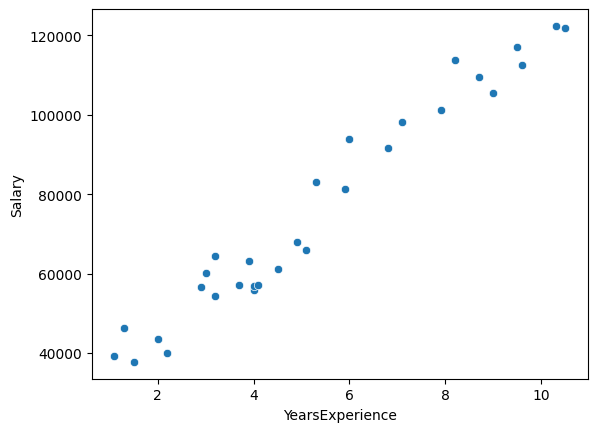

In [ ]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary')


Our job is to create a line of best fit where the error function is minimised. Error function to be used will be decided later

In [ ]:
# retrieving independent and dependent variables

X - independent
Y - dependent

Linear Regression needs these values to split train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x = df['YearsExperience']
y = df['Salary']
seed = 1

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=seed)

# train and test data are to be split up
# y_train and y_test are dependent variable labels that are to be predicted by a model
# continuous values

In [ ]:
#print(X_train)
print(X_test)
print('---------------')
#print(y_train)
print(y_test)

[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]
 [9.5]
 [2. ]]
---------------
17     83088.0
21     98273.0
10     63218.0
19     93940.0
14     61111.0
20     91738.0
26    116969.0
3      43525.0
Name: Salary, dtype: float64


FORMAT
The format here is the column number and the Years Experience

In [ ]:
from numpy import reshape
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(22, 1)
(8, 1)
(22,)
(8,)


STARTING FITTING

In [ ]:
salary_model_lr = LinearRegression()

#salary_model_lr.fit(X_train, y_train) - this currently gives error as the data is 1 dimensional
salary_model_lr.fit(X_train, y_train)



LinearRegression()

The linear model has been drawn, we ned to use Ordinary Least Squares to minimise MSE
We know want to work out MSE, save, plot on a bar chart to see our progress

But first, prediction

In [ ]:
y_pred = salary_model_lr.predict(X_test)
y_pred

array([ 74978.61852009,  91649.44173553,  62012.42268586,  81461.7164372 ,
        67569.36375767,  88870.97119962, 113877.20602278,  44415.44262512])

In [ ]:
for x in y_pred:
  print(f'Prediction is {round(x, 1)}')
print('------------------------------------------------------------')
for x in y_test:
  print(f'Real value is {x}')

Prediction is 74978.6
Prediction is 91649.4
Prediction is 62012.4
Prediction is 81461.7
Prediction is 67569.4
Prediction is 88871.0
Prediction is 113877.2
Prediction is 44415.4
------------------------------------------------------------
Real value is 83088.0
Real value is 98273.0
Real value is 63218.0
Real value is 93940.0
Real value is 61111.0
Real value is 91738.0
Real value is 116969.0
Real value is 43525.0


We can plot actual and predicted values on a graph

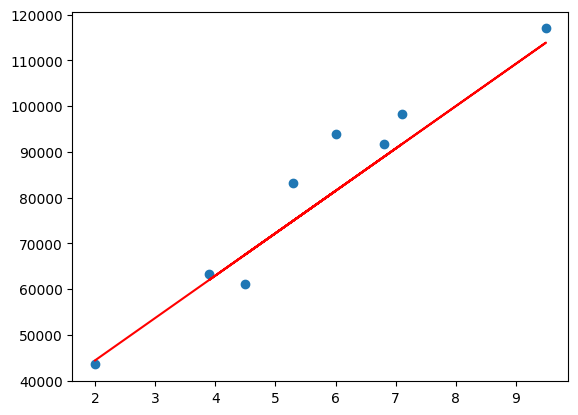

In [ ]:
plt.scatter(x=X_test, y=y_test, label='Actual Salary')
plt.plot(X_test, y_pred, label= 'Predicted Salary', color = 'red')


We can now plot MSE for Linear Regression, Decision Tree Regressor, Random Forest Regressor, Logistic Regressor



In [ ]:
# THIS CODE SHOULD NOT BE EDITED
MSE_tests = []

In [ ]:
# THIS CODE SHOULD NOT BE EDITED
MSE = metrics.mean_squared_error(y_pred, y_test)
print(MSE)
MSE_tests.append(MSE)

print(MSE_tests)

#if len(MSE_tests) > 4:
 # MSE_tests.clear()
  # at this point we have collected data for all 4 algorithms and want to re-collect

80494202.625
[40884620.50478402, 82632011.78125, 93865860.27436256, 80494202.625]


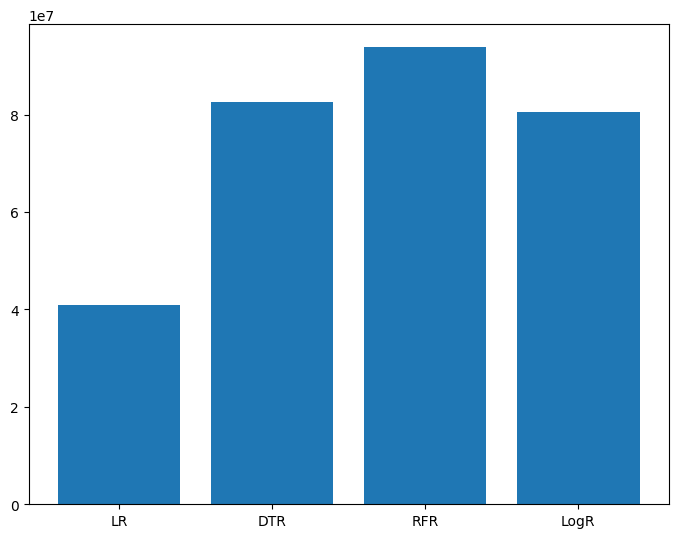

In [ ]:
# THIS CODE SHOULD NOT BE EDITED

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['LR', 'DTR', 'RFR', 'LogR']
students = MSE_tests
ax.bar(langs,students)
plt.show()


This shows that Linear Regression produces least MSE

In [ ]:
# MORE PREDICTION WITH NEW DATA
NEW_DATA = pd.read_csv('/content/NEW_DATA.csv')

UnicodeDecodeError: ignored

In [ ]:
new_pred = salary_model_lr.predict(NEW_DATA)
NEW_DATA